In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import os
from cellpose import io
from liams_funcs import *
from features import *

import pandas as pd

In [2]:
control_dir = '../control_images/'
penetramax_dir = '../penetramax_images/'

control_fnames = [control_dir + fname for fname in os.listdir(control_dir)]
penetramax_fnames = [penetramax_dir + fname for fname in os.listdir(penetramax_dir)]

In [3]:
fname1 = '../control_images/001_z26.png'
fname2 = '../penetramax_images/011_z57.png'

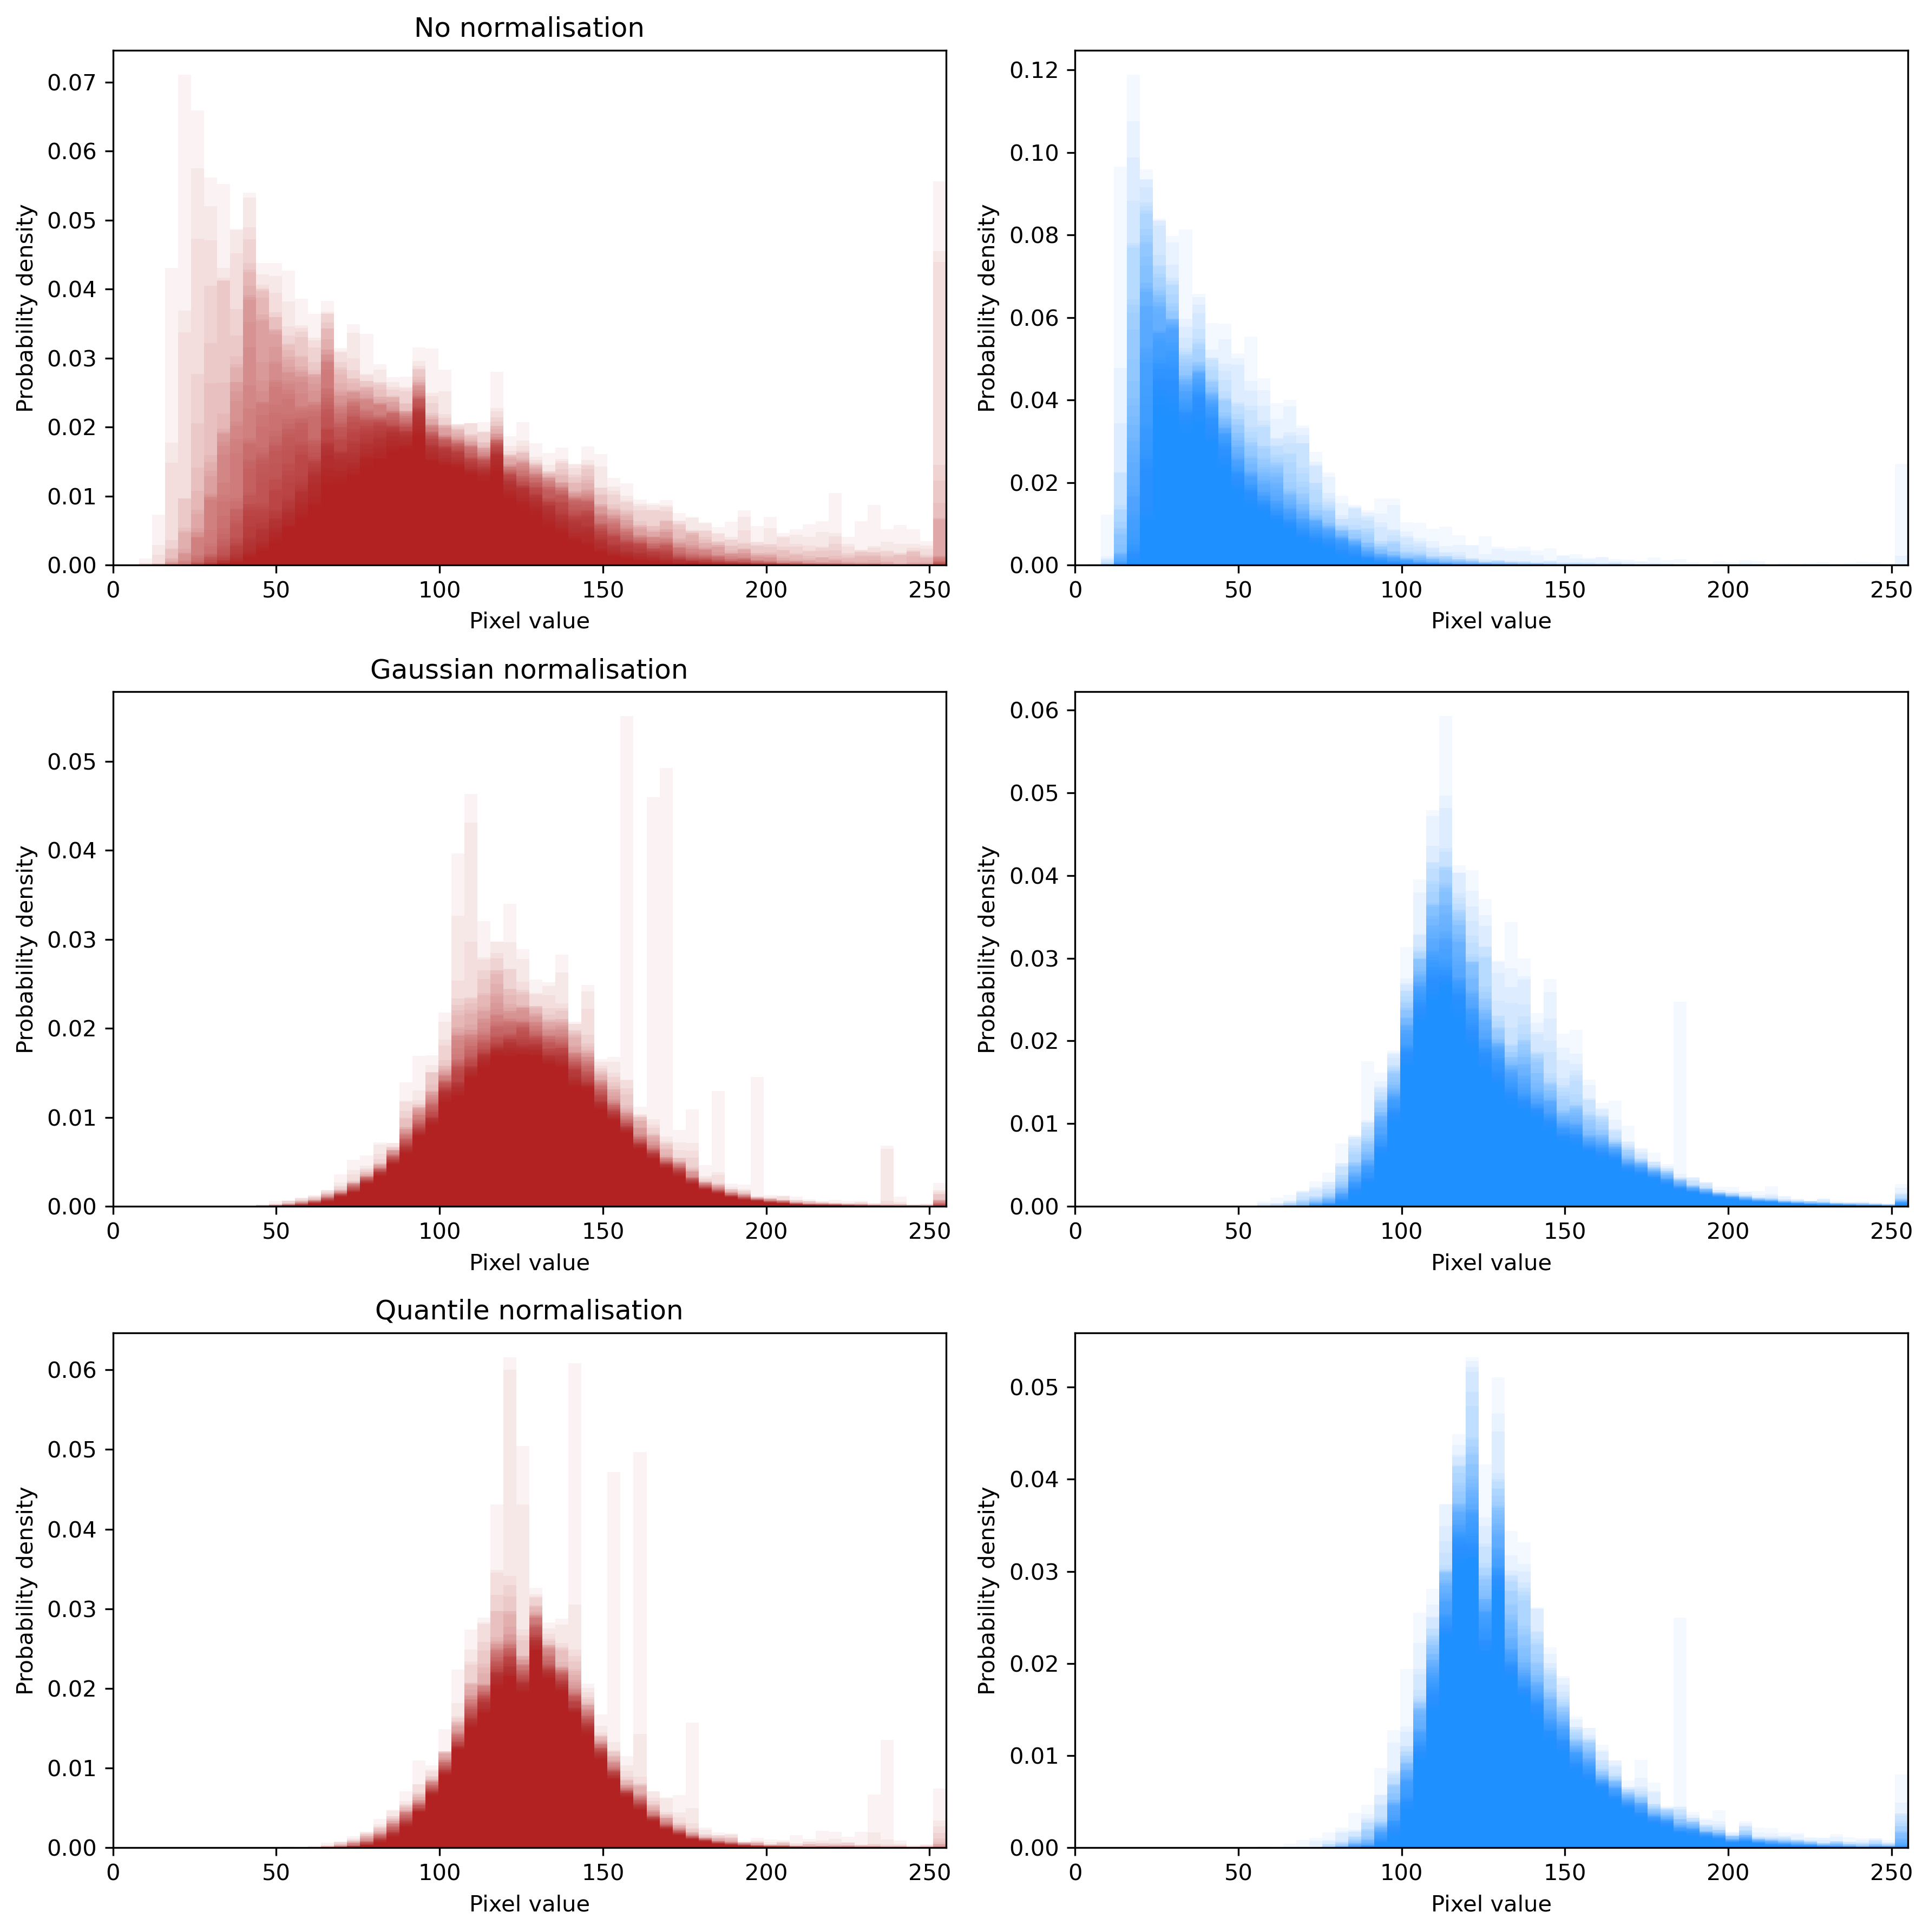

In [4]:
data = np.load('../segments/control/001_z26.png.npy')
image = io.imread('../control_images/001_z26.png')

reds, blues = image[:,:,0], image[:,:,2]
combined_cells, combined_nuclei = data[:,:,0], data[:,:,1]

vals = get_mask_levels(combined_nuclei)
fig, axes = plt.subplots(3, 2, figsize=(12, 12), dpi=300)

for val in vals:
    mask = (combined_nuclei == val)
    red = reds[mask]
    blue = blues[mask]

    counts_red, edges = np.histogram(red, bins=64, range=(0,255), density=True)
    counts_blue, _ = np.histogram(blue, bins=64, range=(0,255), density=True)

    axes[0,0].stairs(counts_red, edges, fill=True, alpha=0.05, color='firebrick')
    axes[0,1].stairs(counts_blue, edges, fill=True, alpha=0.05, color='dodgerblue')

    counts_red, edges = np.histogram(ZtoRGB(gaussian_normalisation(red)), bins=64, range=(0, 255), density=True)
    counts_blue, _= np.histogram(ZtoRGB(gaussian_normalisation(blue)), bins=64, range=(0, 255), density=True)

    axes[1,0].stairs(counts_red, edges, fill=True, alpha=0.05, color='firebrick')
    axes[1,1].stairs(counts_blue, edges, fill=True, alpha=0.05, color='dodgerblue')

    counts_red, edges = np.histogram(ZtoRGB(quantile_normalisation(red)), bins=64, range=(0, 255), density=True)
    counts_blue, _ = np.histogram(ZtoRGB(quantile_normalisation(blue)), bins=64, range=(0, 255), density=True)

    axes[2,0].stairs(counts_red, edges, fill=True, alpha=0.05, color='firebrick')
    axes[2,1].stairs(counts_blue, edges, fill=True, alpha=0.05, color='dodgerblue')

for ax in axes.flatten():
    ax.set_ylim(0)
    ax.set_ylabel('Probability density')
    ax.set_xlabel('Pixel value')
    ax.set_xlim(0, 255)
    
axes[0,0].set_title('No normalisation'); axes[1,0].set_title('Gaussian normalisation'); axes[2,0].set_title('Quantile normalisation')

plt.tight_layout()
plt.savefig('../figures/spectrum_normalisations_control.png', dpi=300, bbox_inches='tight')
plt.show()

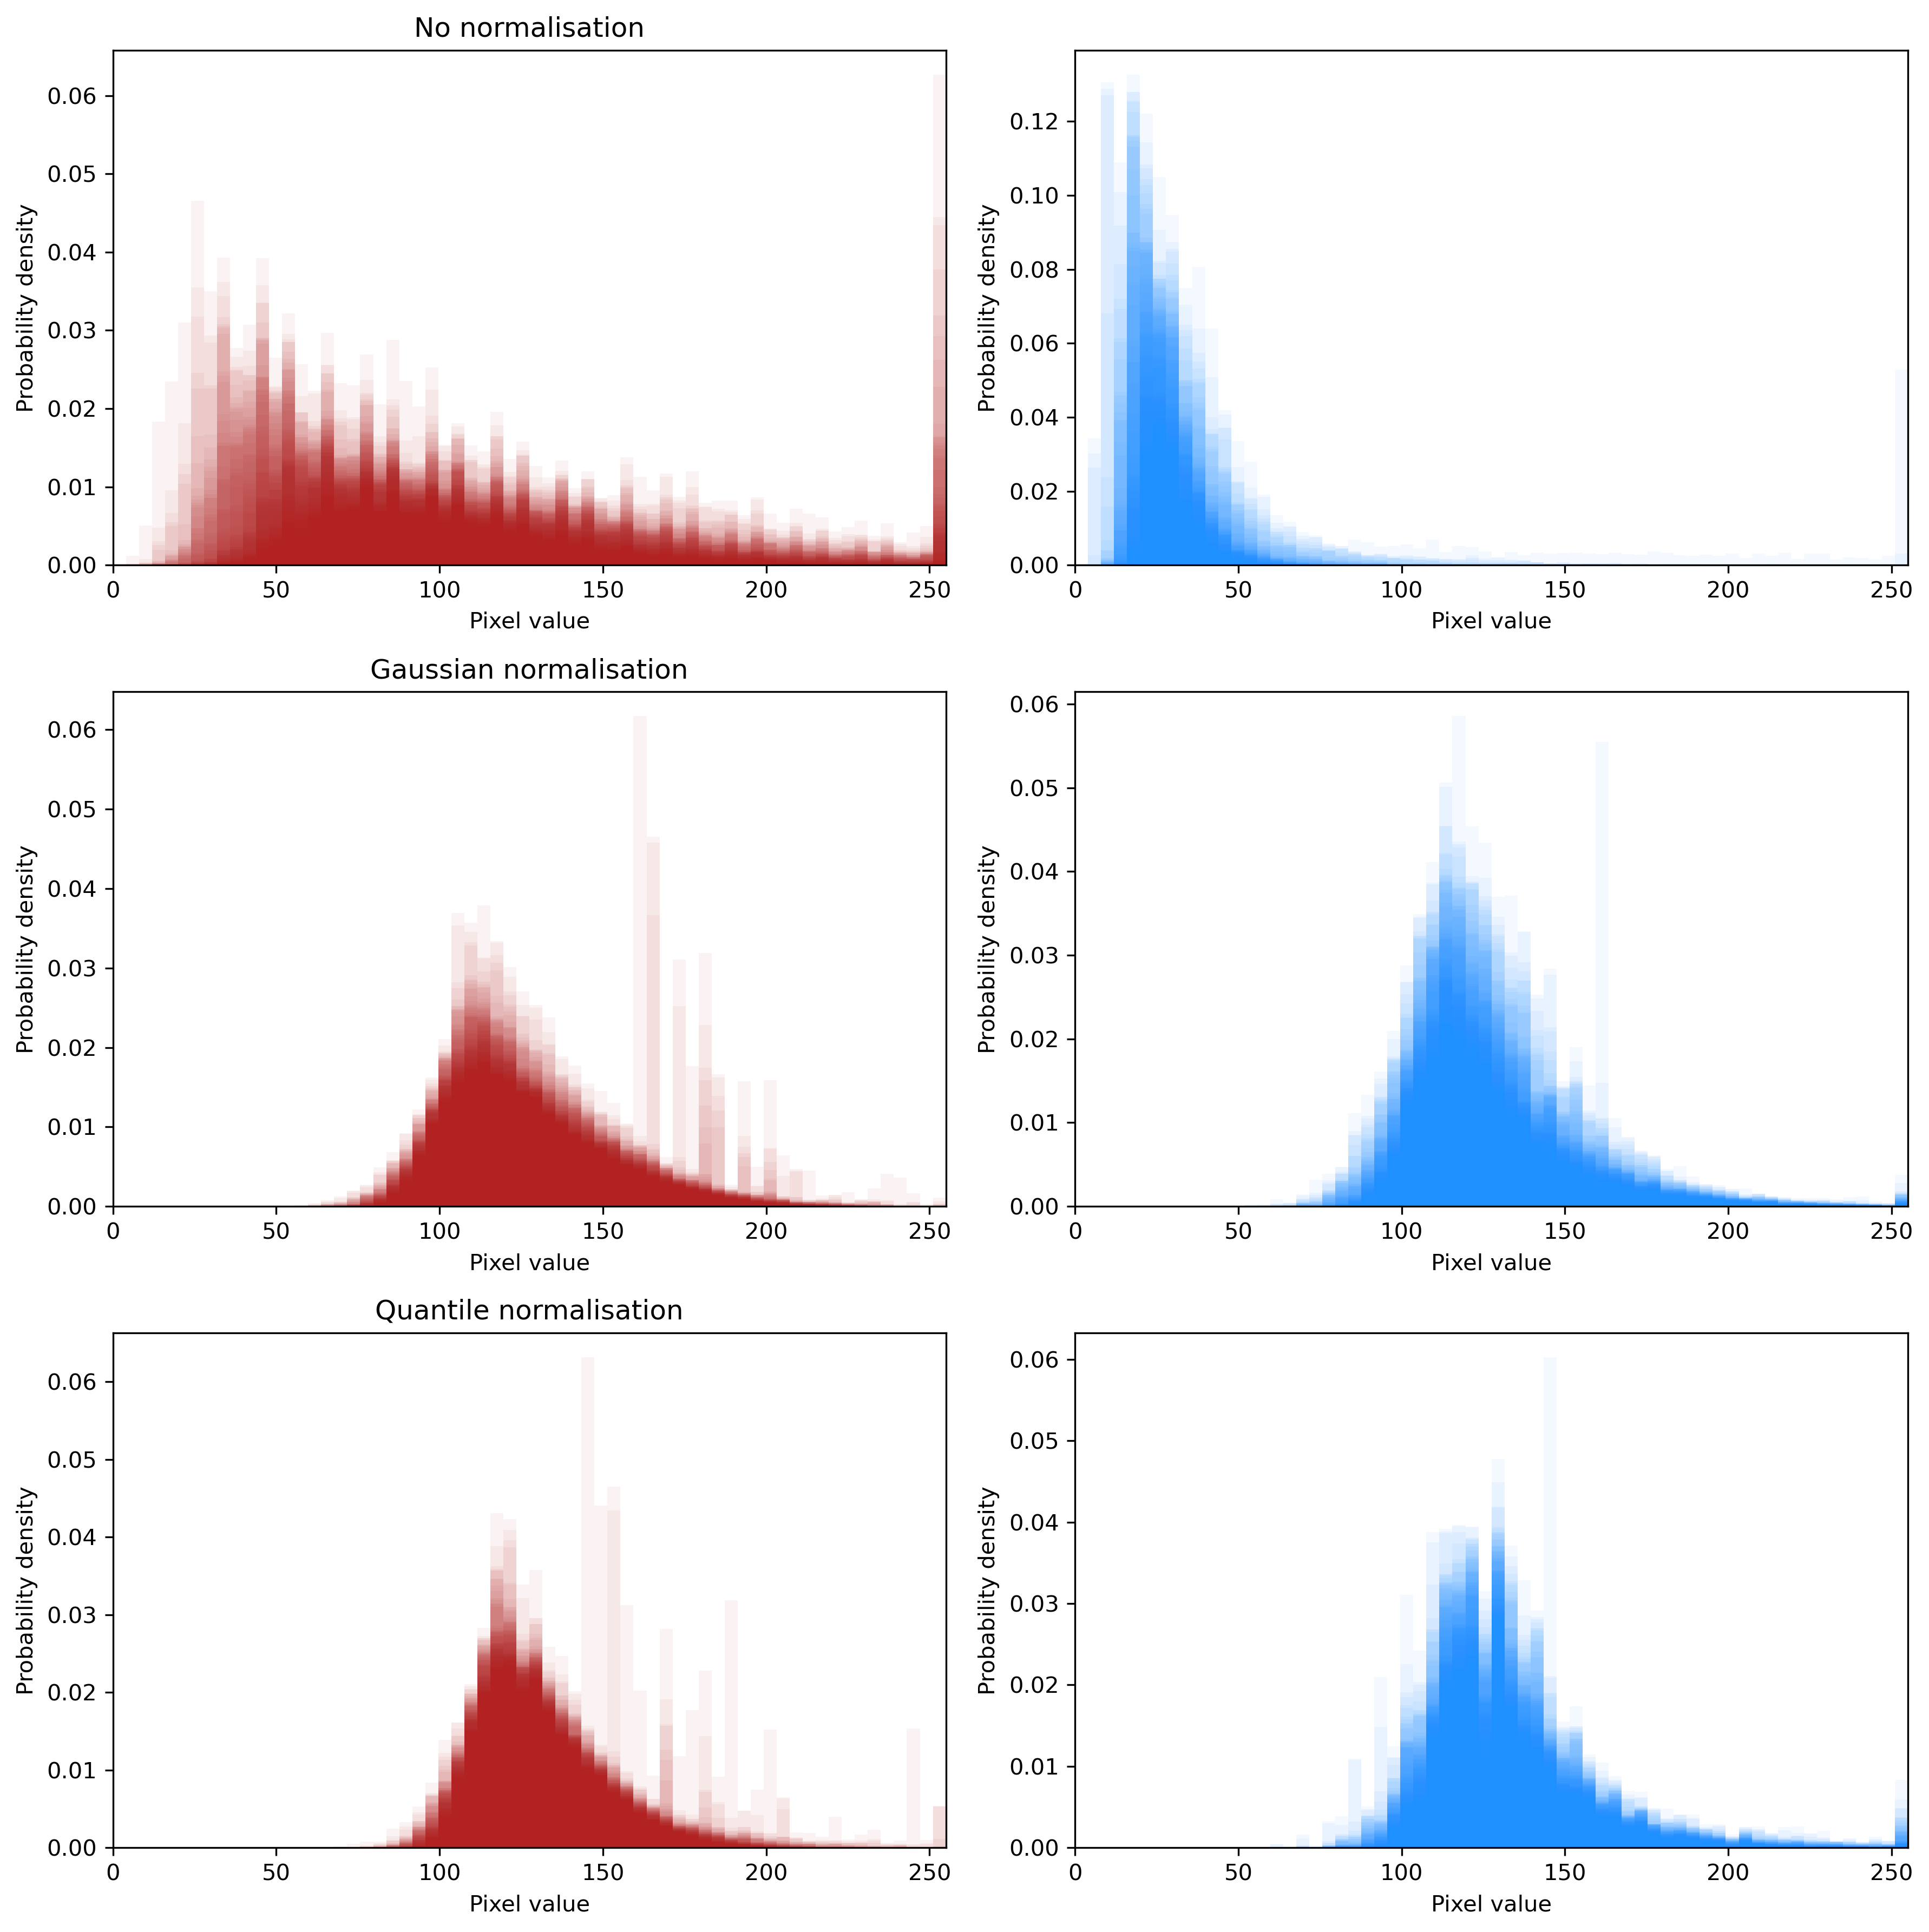

In [5]:
data = np.load('../segments/penetramax/011_z57.png.npy')
image = io.imread('../penetramax_images/011_z57.png')

reds, blues = image[:,:,0], image[:,:,2]
combined_cells, combined_nuclei = data[:,:,0], data[:,:,1]

vals = get_mask_levels(combined_nuclei)
fig, axes = plt.subplots(3, 2, figsize=(12, 12), dpi=300)

for val in vals:
    mask = (combined_nuclei == val)
    red = reds[mask]
    blue = blues[mask]

    counts_red, edges = np.histogram(red, bins=64, range=(0,255), density=True)
    counts_blue, _ = np.histogram(blue, bins=64, range=(0,255), density=True)

    axes[0,0].stairs(counts_red, edges, fill=True, alpha=0.05, color='firebrick')
    axes[0,1].stairs(counts_blue, edges, fill=True, alpha=0.05, color='dodgerblue')

    counts_red, edges = np.histogram(ZtoRGB(gaussian_normalisation(red)), bins=64, range=(0, 255), density=True)
    counts_blue, _= np.histogram(ZtoRGB(gaussian_normalisation(blue)), bins=64, range=(0, 255), density=True)

    axes[1,0].stairs(counts_red, edges, fill=True, alpha=0.05, color='firebrick')
    axes[1,1].stairs(counts_blue, edges, fill=True, alpha=0.05, color='dodgerblue')

    counts_red, edges = np.histogram(ZtoRGB(quantile_normalisation(red)), bins=64, range=(0, 255), density=True)
    counts_blue, _ = np.histogram(ZtoRGB(quantile_normalisation(blue)), bins=64, range=(0, 255), density=True)

    axes[2,0].stairs(counts_red, edges, fill=True, alpha=0.05, color='firebrick')
    axes[2,1].stairs(counts_blue, edges, fill=True, alpha=0.05, color='dodgerblue')

for ax in axes.flatten():
    ax.set_ylim(0)
    ax.set_ylabel('Probability density')
    ax.set_xlabel('Pixel value')
    ax.set_xlim(0, 255)
    
axes[0,0].set_title('No normalisation'); axes[1,0].set_title('Gaussian normalisation'); axes[2,0].set_title('Quantile normalisation')

plt.tight_layout()
plt.savefig('../figures/spectrum_normalisations_drug.png', dpi=300, bbox_inches='tight')
plt.show()

In [4]:
ds = Dataset(control_fnames, penetramax_fnames, flux_normalisation=gaussian_normalisation)

Instantiating masks...


0it [00:00, ?it/s]

4it [00:37,  9.43s/it]


Retrieving features...


100%|██████████| 4/4 [00:08<00:00,  2.13s/it]


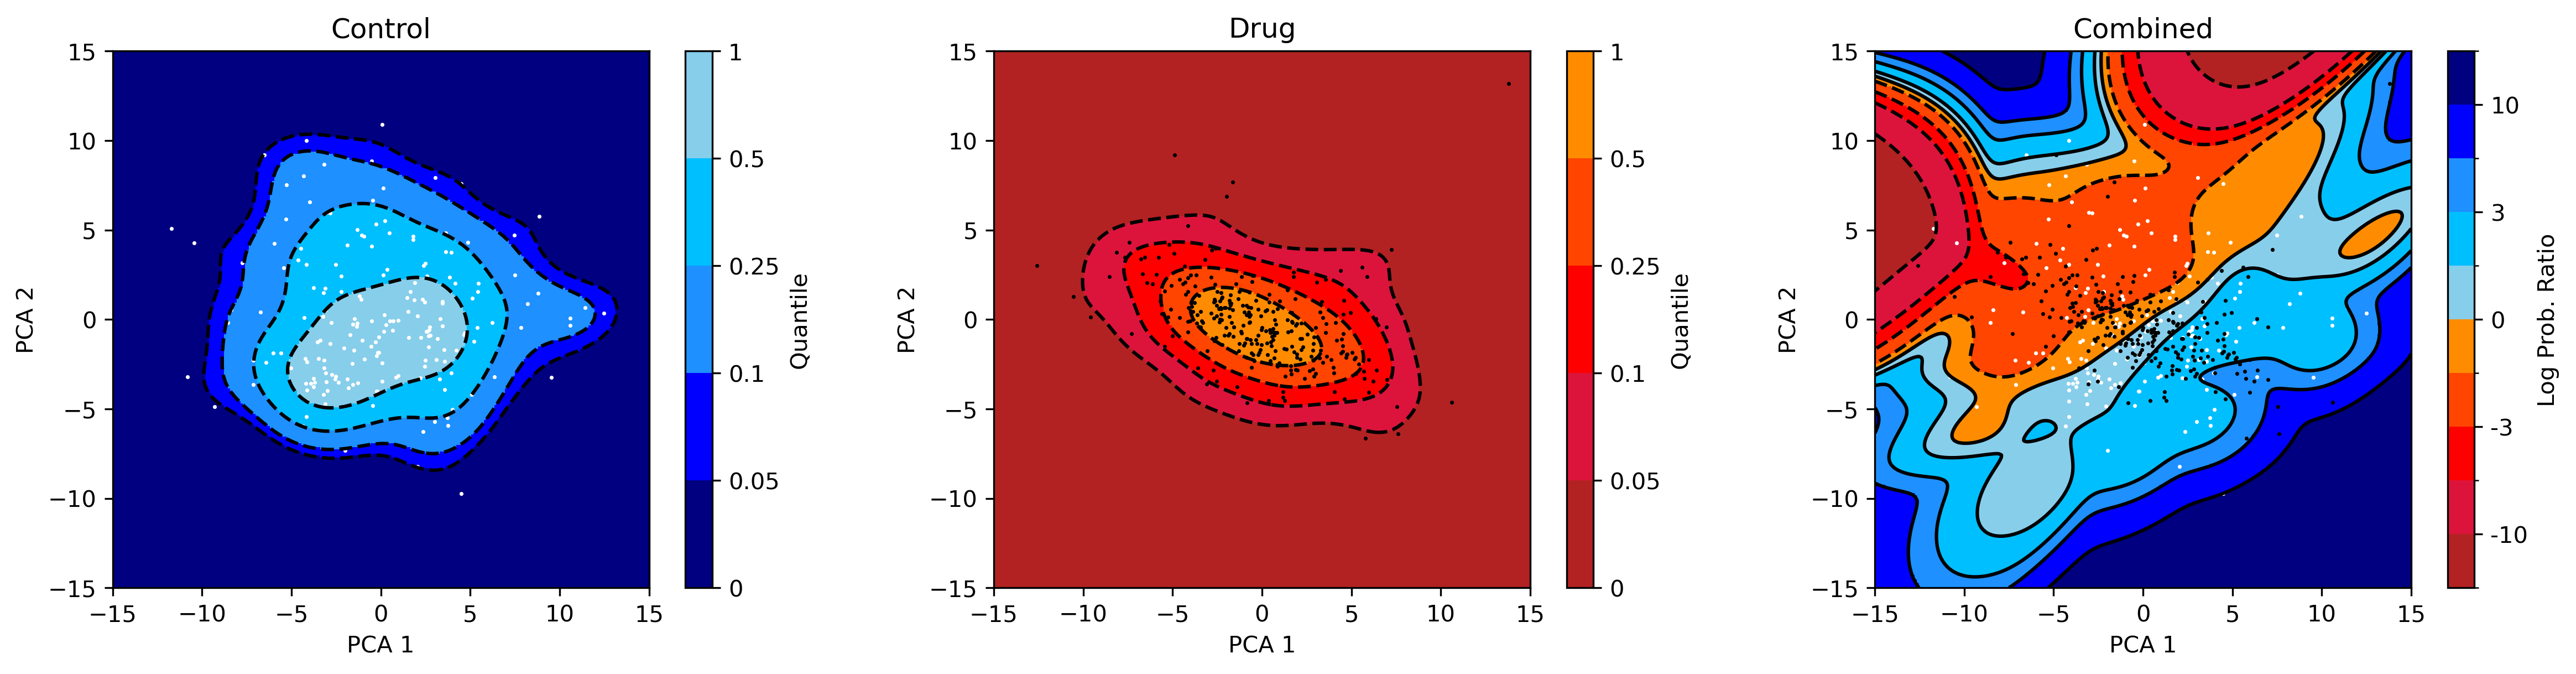

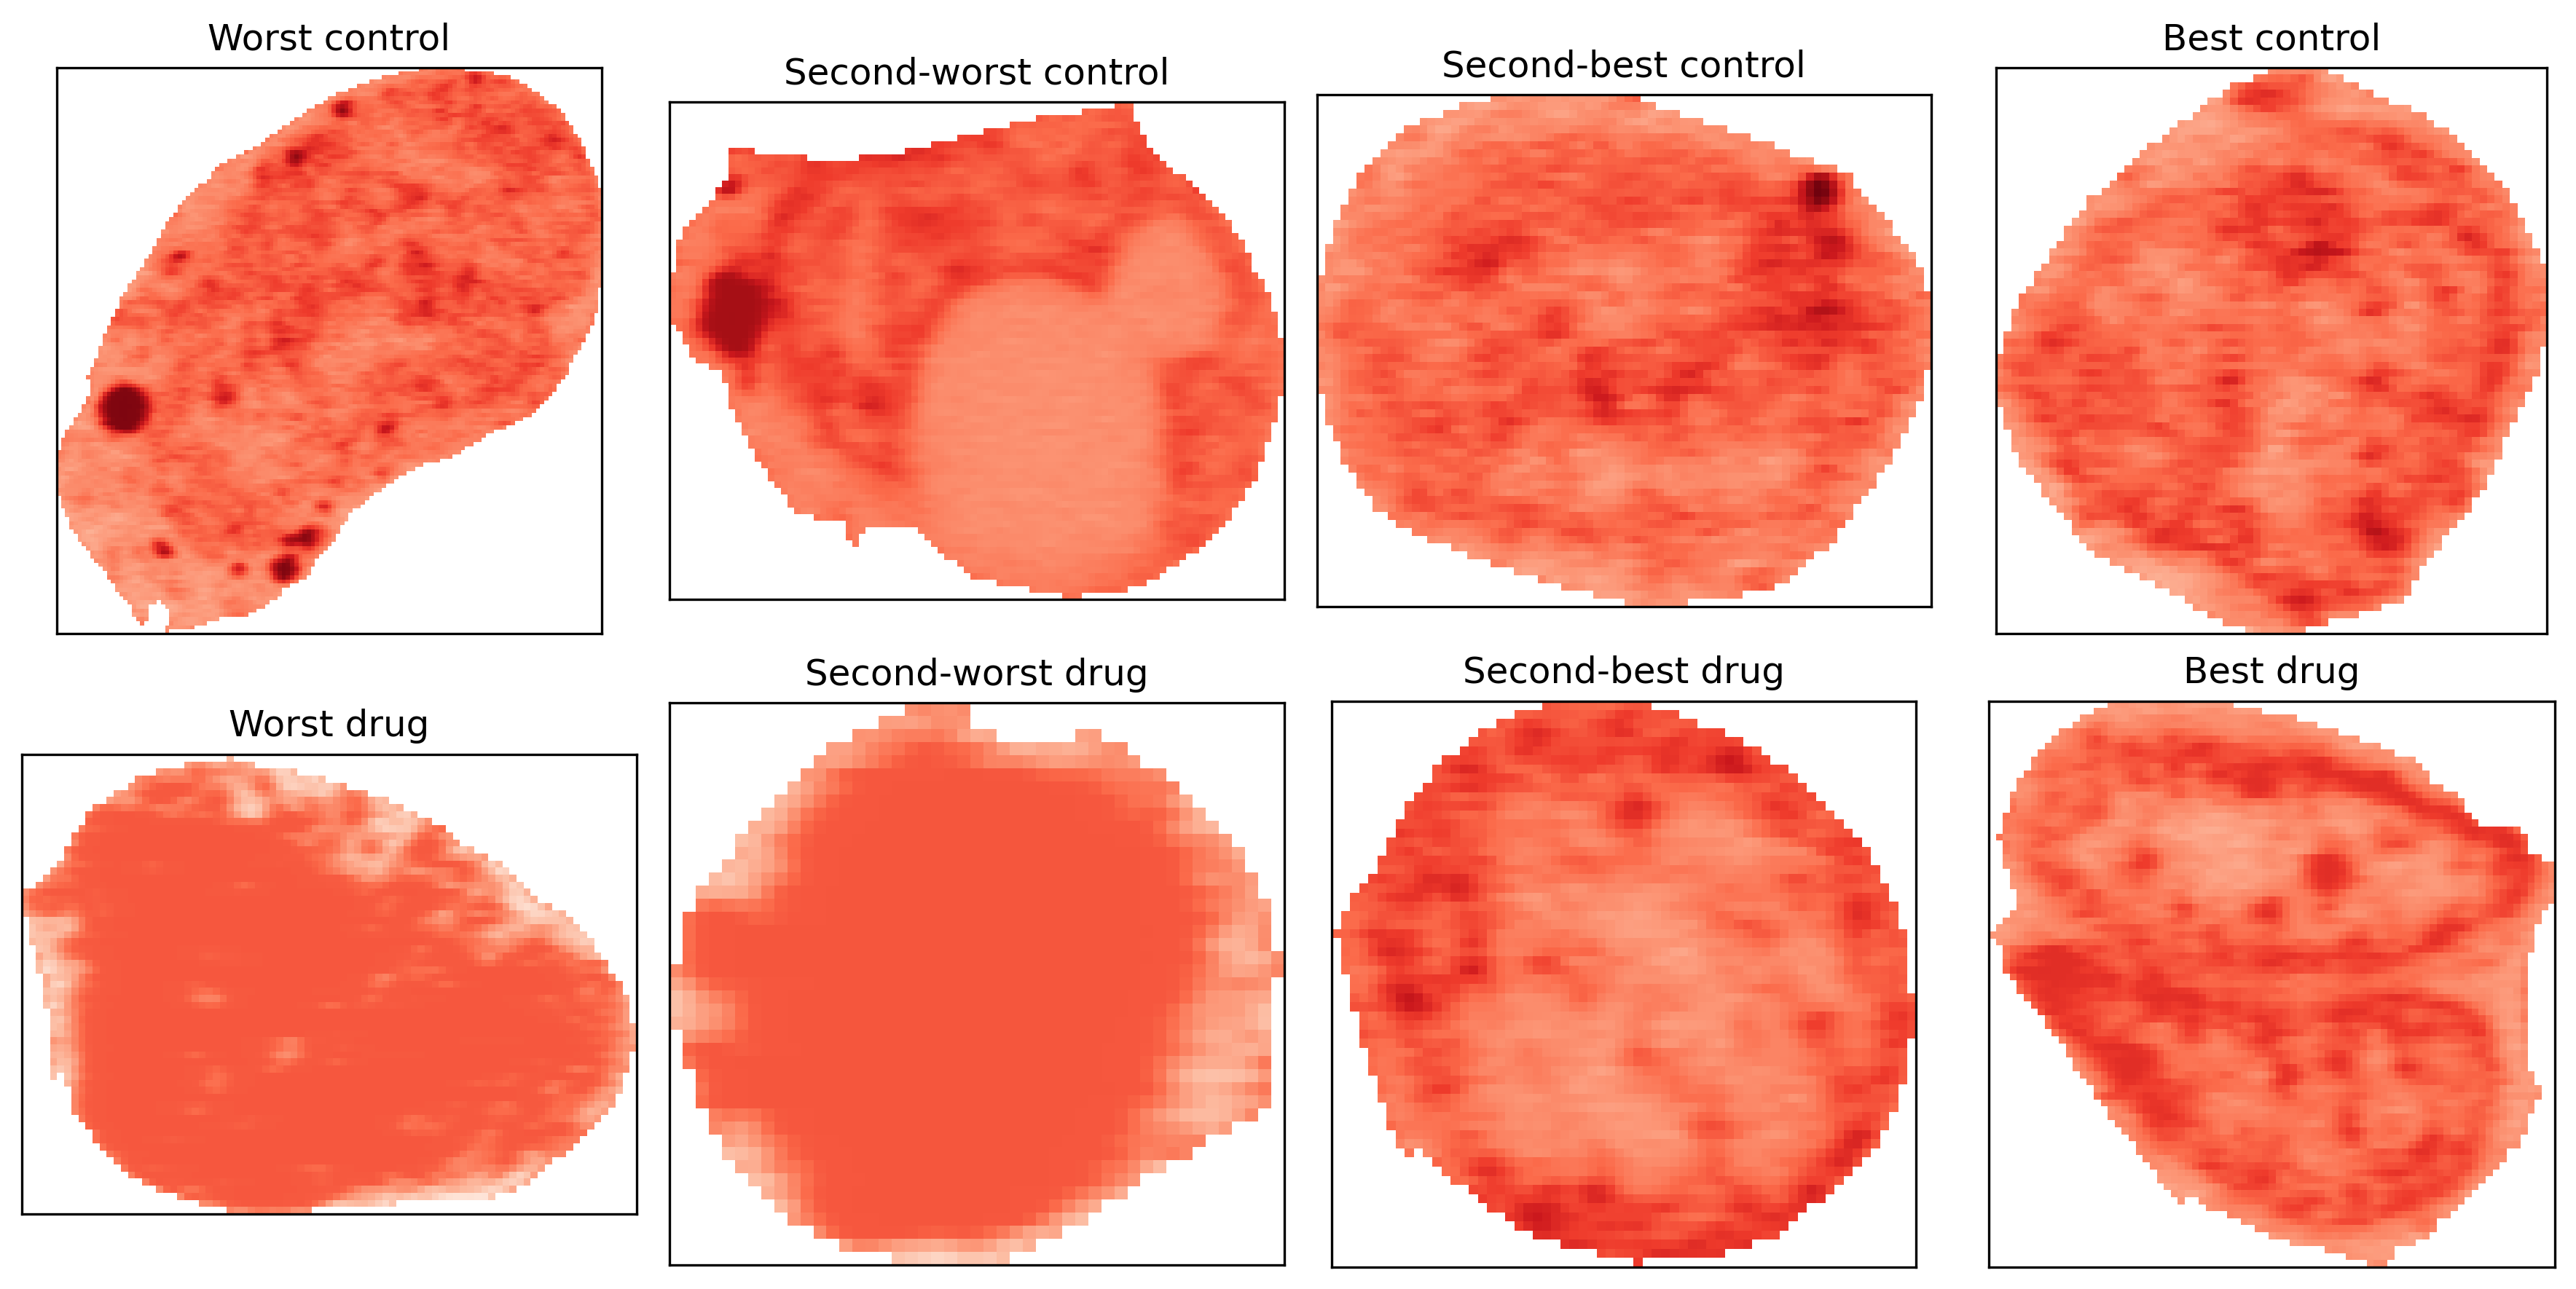

In [5]:
ds.performDimReduction()
ds.makeKDE(show_plot=True, save_to='../figures/cluster_analysis.png', resolution=256, threshold=0.05)
ds.showBestAndWorst()

In [6]:
ds.makeDBSCAN(show_plot=True)

: 

In [8]:
df_unfiltered = ds.makeSelectionKDE(q_control=-1, q_drug=-1)
df_05 = ds.makeSelectionKDE(q_control=0.05, q_drug=0.05)
df_10 = ds.makeSelectionKDE(q_control=0.1, q_drug=0.1)
df_15 = ds.makeSelectionKDE(q_control=0.15, q_drug=0.15)
df_20 = ds.makeSelectionKDE(q_control=0.20, q_drug=0.20)
df_25 = ds.makeSelectionKDE(q_control=0.25, q_drug=0.25)

In [9]:
df_unfiltered.to_csv('feature_data/features_00.csv', index=False)
df_05.to_csv('feature_data/features_05.csv', index=False)
df_10.to_csv('feature_data/features_10.csv', index=False)
df_15.to_csv('feature_data/features_15.csv', index=False)
df_20.to_csv('feature_data/features_20.csv', index=False)
df_25.to_csv('feature_data/features_25.csv', index=False)

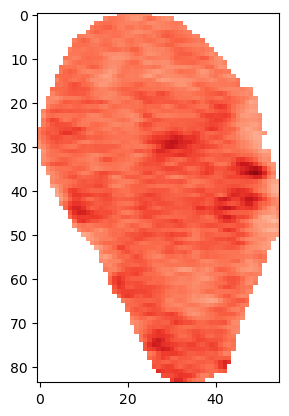

In [10]:
plt.imshow(ds.masks[4].segments[0].nucleusR, cmap='Reds', vmin=0, vmax=255)